<a href="https://colab.research.google.com/github/MehrnazFarahmand/Internship/blob/main/insurance_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

* We can drop policy number as it won't have anything to do with target
* We can drop bind date as we already have months as customer
* we can drop incident date as it seems to be in just a 3 months period so there is not variation in the data to be able to see a relationship with target

In [8]:
data.drop(['_c39','incident_date','policy_bind_date','policy_number'], axis=1, inplace=True)

In [9]:
data.shape

(1000, 36)

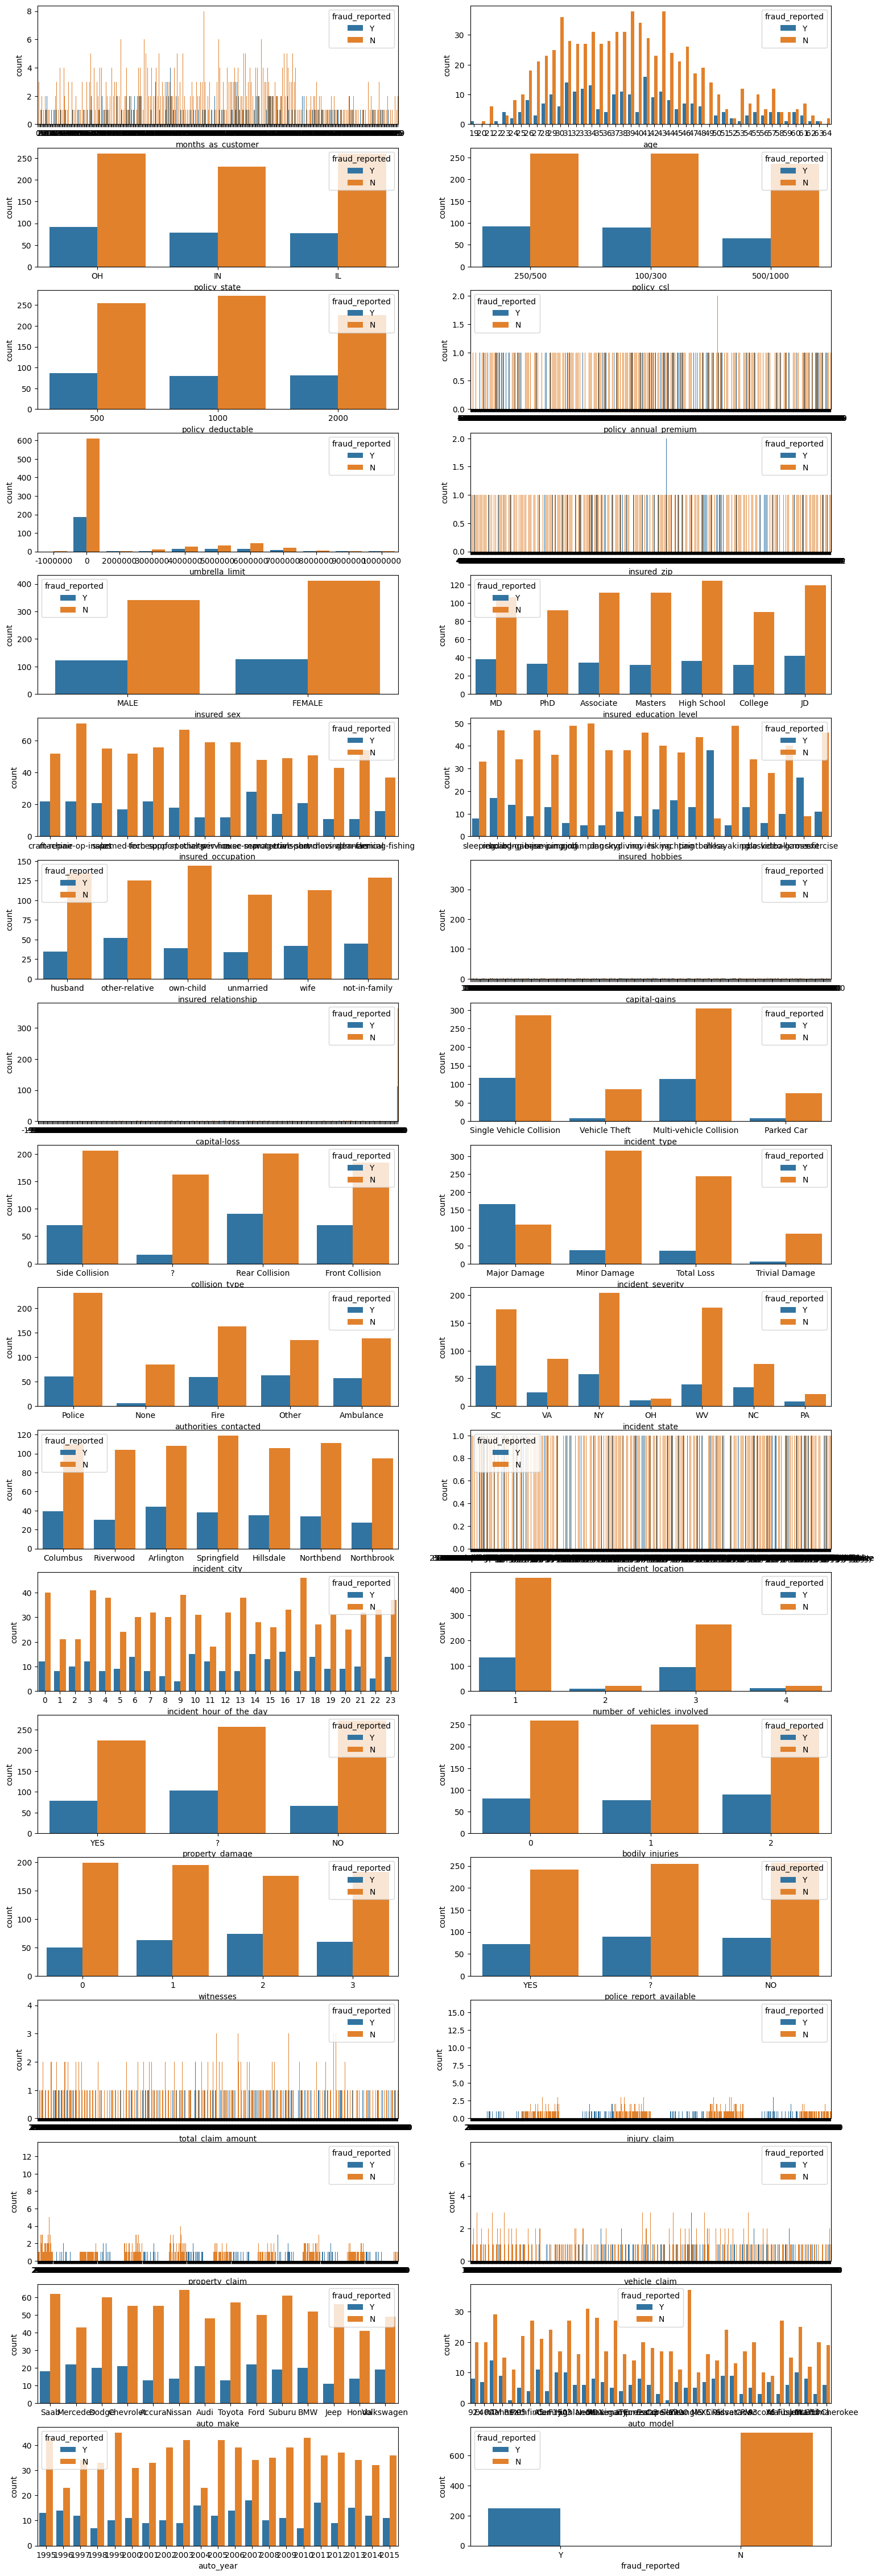

In [13]:
plt.figure(figsize = (18,58))
plotnumber = 1
for col in data.columns:
    if plotnumber<=36:
        ax = plt.subplot(18,2,plotnumber)
        sns.countplot(x = data[col], hue=data['fraud_reported'])
        plt.xlabel(col)
        plotnumber +=1

* strangely , people who are into cross fit and chess seem to have made more fraudulant claims
* males made slightly more fraudulant claims
* the larger the damage claimed for, the more fraud
* certain locations and zip codes seem to have higher number of fraud

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

In [20]:
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


<Axes: >

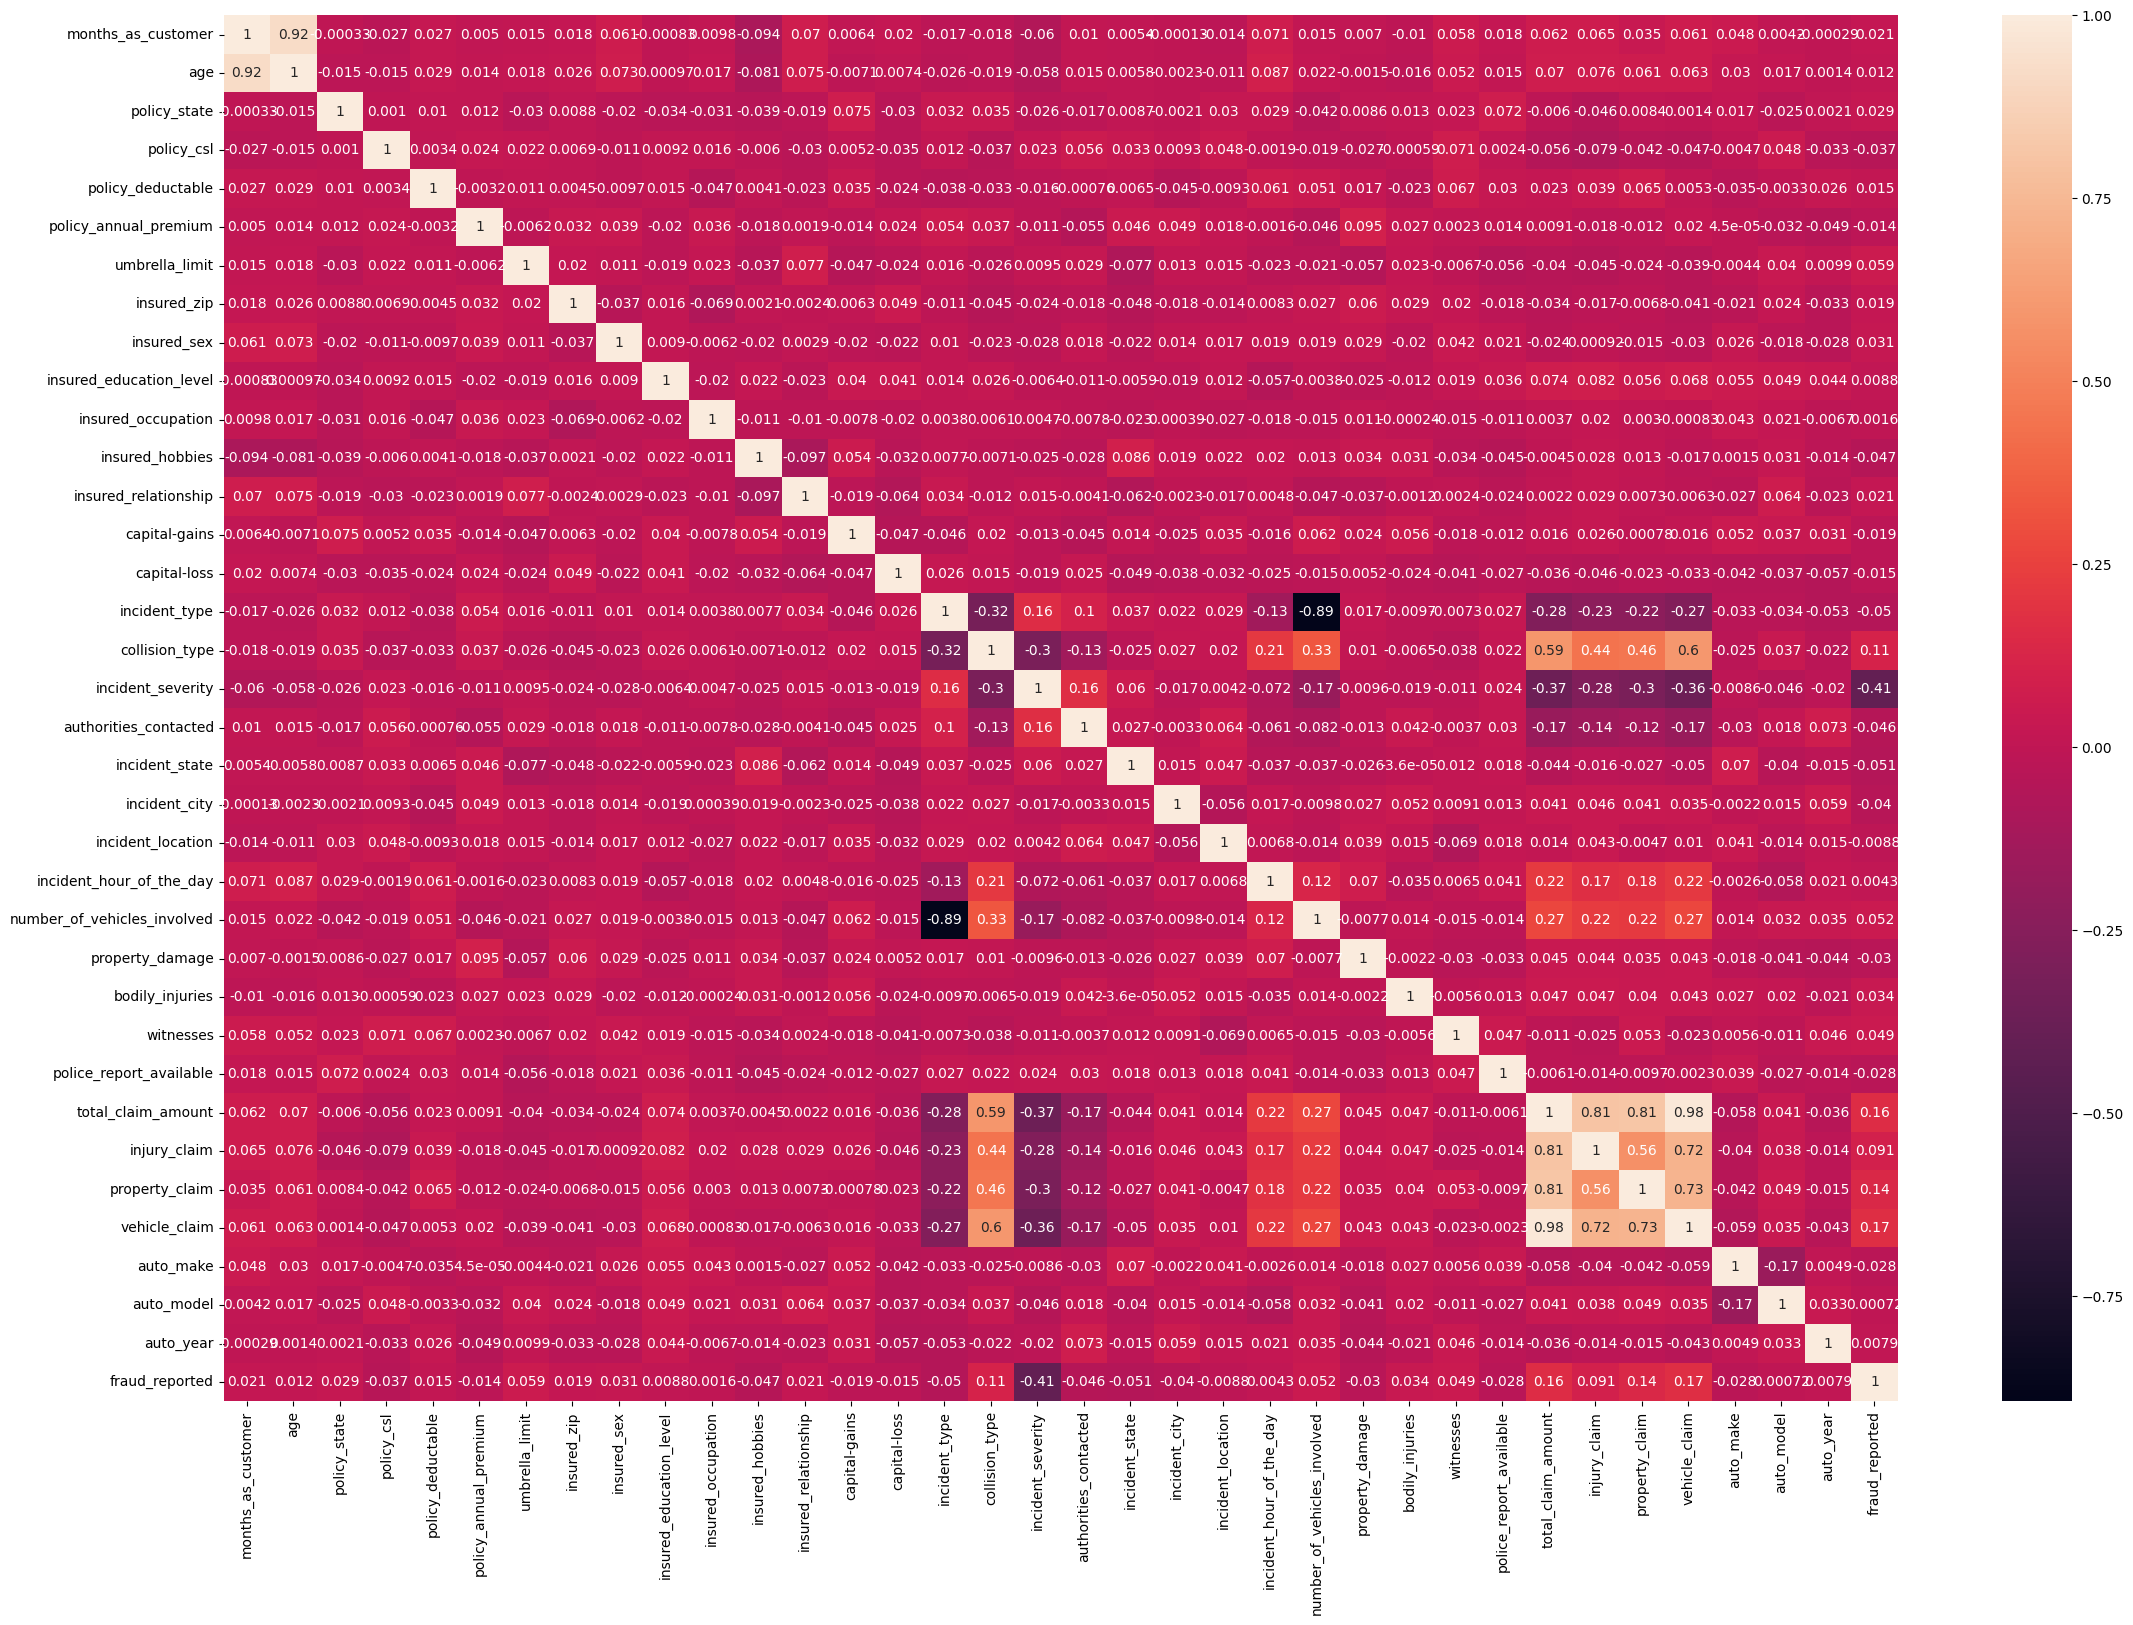

In [25]:
plt.figure(figsize = (27,18))
sns.heatmap(data.corr(), annot = True)

We drop the columns that don't have a strong relationship with target, then we need to sort out the multicolinearity before modeling

In [26]:
data.drop(['auto_year','auto_model','incident_hour_of_the_day','incident_location','insured_occupation','insured_education_level'], axis=1 , inplace=True)

In [27]:
data.shape

(1000, 30)

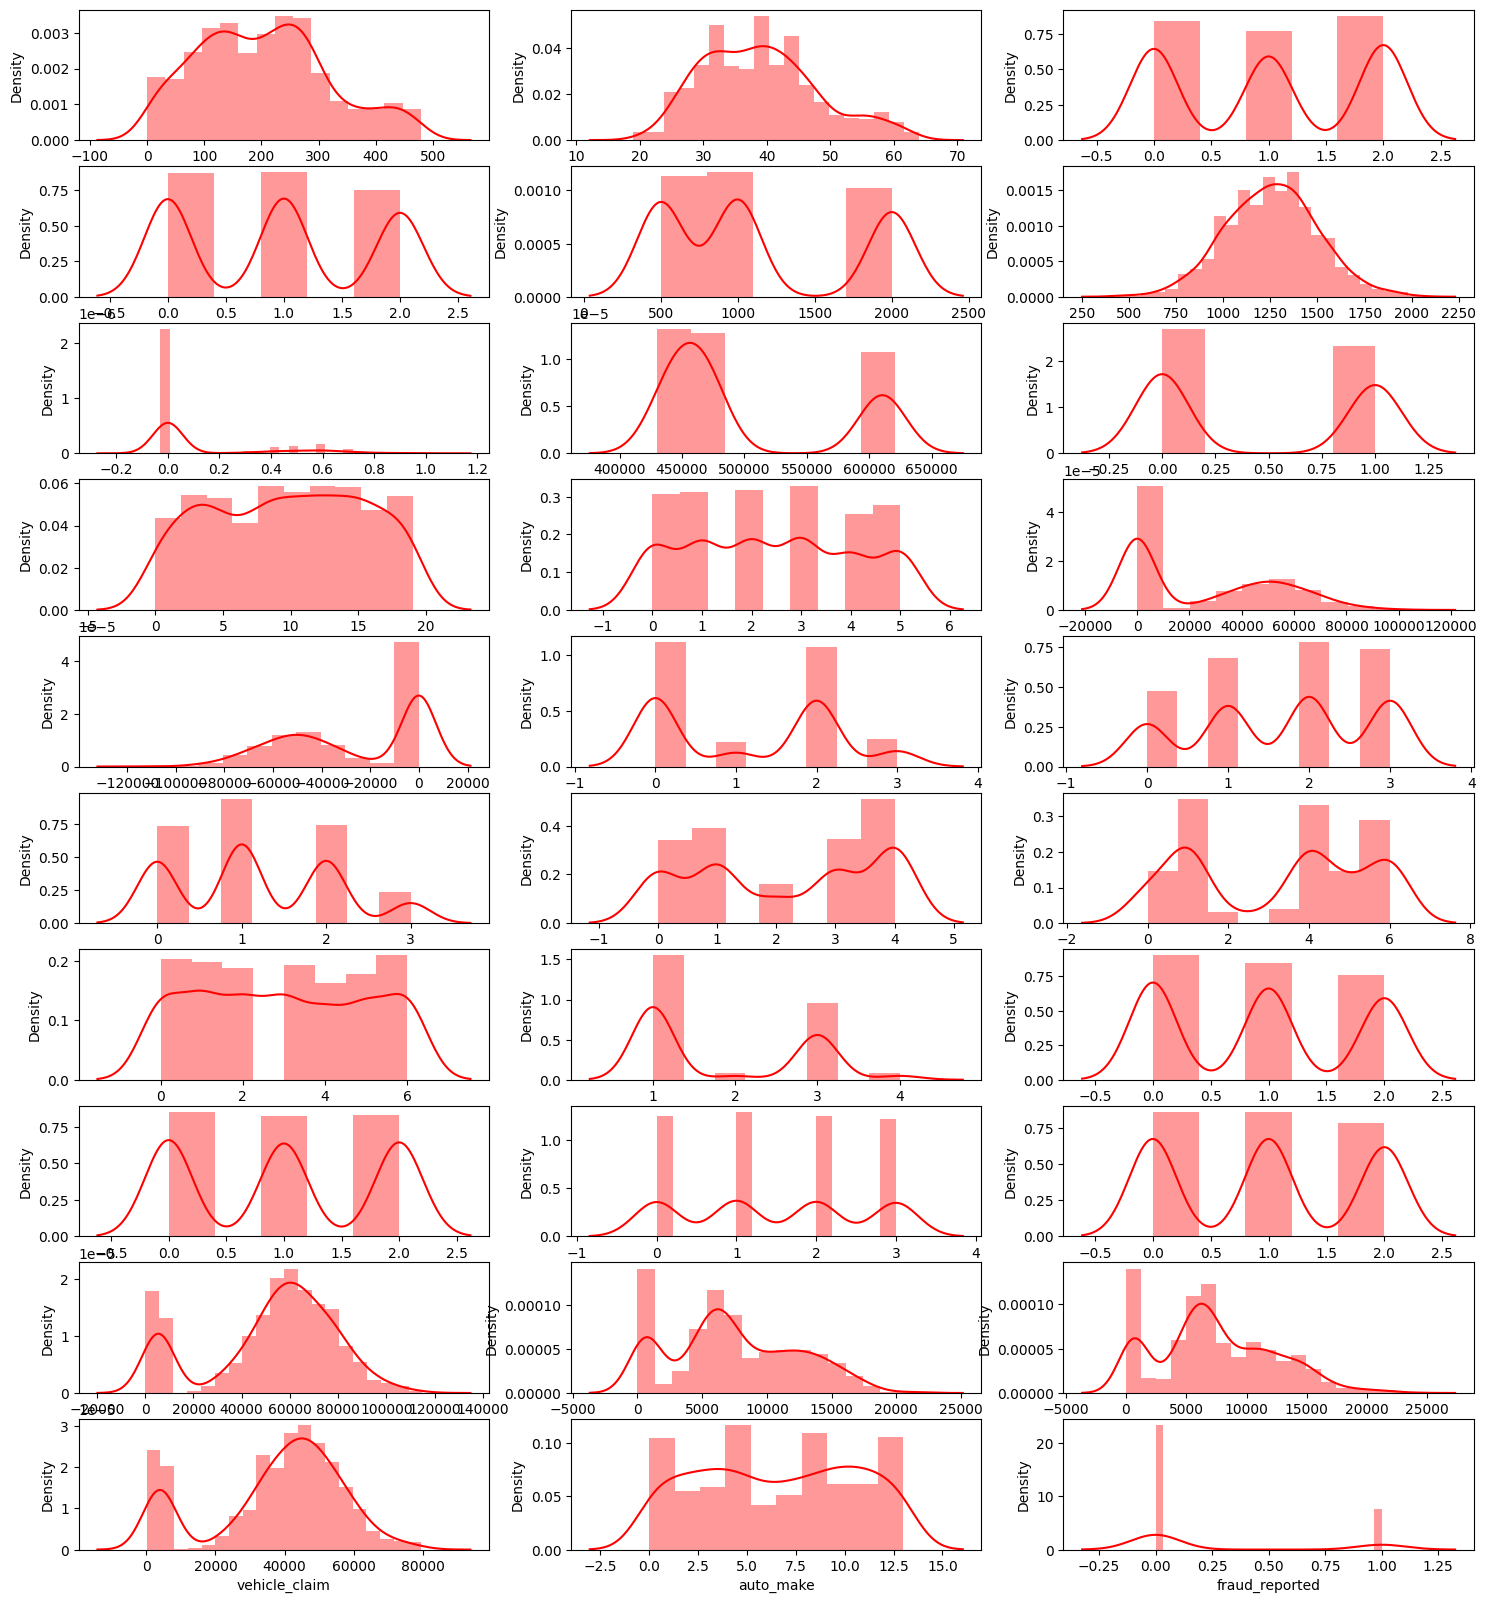

In [32]:
plt.figure(figsize = (18,20))
plotnumber = 1
for col in data.columns:
    if plotnumber<=30:
      ax = plt.subplot(10,3,plotnumber)
      sns.distplot(data[col], color='r')
      plt.xlabel(col)
      plotnumber +=1

In [33]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
x = data.drop(['fraud_reported'], axis=1)
y = data['fraud_reported']

In [36]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,6.827822,months_as_customer
1,6.823129,age
2,1.028046,policy_state
3,1.020957,policy_csl
4,1.030014,policy_deductable
5,1.034308,policy_annual_premium
6,1.027572,umbrella_limit
7,1.024177,insured_zip
8,1.024723,insured_sex
9,1.045192,insured_hobbies


In [42]:
x_scaled.drop(['injury_claim','property_claim','vehicle_claim','incident_type','age'], axis=1 , inplace=True)

In [43]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,1.037469,months_as_customer
1,1.022663,policy_state
2,1.016734,policy_csl
3,1.020948,policy_deductable
4,1.028464,policy_annual_premium
5,1.026870,umbrella_limit
6,1.020669,insured_zip
7,1.017469,insured_sex
8,1.038770,insured_hobbies
9,1.034358,insured_relationship


In [44]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE()
x1, y1 = sm.fit_resample(x_scaled,y)

In [58]:
y1.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
MaxAccu = 0
MaxRS = 0
for i in range(1,400):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.8075221238938053 
 Best Random State: 302


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest**

In [61]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.915929203539823
[[204  15]
 [ 23 210]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       219
           1       0.93      0.90      0.92       233

    accuracy                           0.92       452
   macro avg       0.92      0.92      0.92       452
weighted avg       0.92      0.92      0.92       452



**Logistic Regression**

In [62]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.8075221238938053
[[172  47]
 [ 40 193]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       219
           1       0.80      0.83      0.82       233

    accuracy                           0.81       452
   macro avg       0.81      0.81      0.81       452
weighted avg       0.81      0.81      0.81       452



**SVC**

In [63]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8805309734513275
[[187  32]
 [ 22 211]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       219
           1       0.87      0.91      0.89       233

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



**Gradient Boosting**

In [64]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.922566371681416
[[199  20]
 [ 15 218]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       219
           1       0.92      0.94      0.93       233

    accuracy                           0.92       452
   macro avg       0.92      0.92      0.92       452
weighted avg       0.92      0.92      0.92       452



**Bagging**

In [65]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.8982300884955752
[[201  18]
 [ 28 205]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       219
           1       0.92      0.88      0.90       233

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



**Cross Validation**

In [66]:
score = cross_val_score(RFC, x1,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.77483444 0.83388704 0.93023256 0.94019934 0.93687708]
0.8832060900750258
Difference Between score mean and accuracy score: 0.03272311346479717


In [67]:
score1 = cross_val_score(LR, x1,y1)
print(score1)
print(score1.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,LRpred)-score1.mean())

[0.71192053 0.73089701 0.7641196  0.78405316 0.75083056]
0.7483641724054475
Difference Between score mean and accuracy score: 0.059157951488357785


In [68]:
score2 = cross_val_score(svc, x1,y1)
print(score2)
print(score2.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,svcpred)-score2.mean())

[0.83112583 0.81727575 0.86378738 0.89700997 0.89368771]
0.8605773250313524
Difference Between score mean and accuracy score: 0.019953648419975045


In [69]:
score3 = cross_val_score(GBC, x1,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score3.mean())

[0.76821192 0.85049834 0.910299   0.93687708 0.92026578]
0.8772304239730699
Difference Between score mean and accuracy score: 0.045335947708346036


In [70]:
score4 = cross_val_score(BC, x1,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score4.mean())

[0.76821192 0.81063123 0.90697674 0.9269103  0.93355482]
0.8692570020461595
Difference Between score mean and accuracy score: 0.028973086449415653


In [71]:
from sklearn import metrics

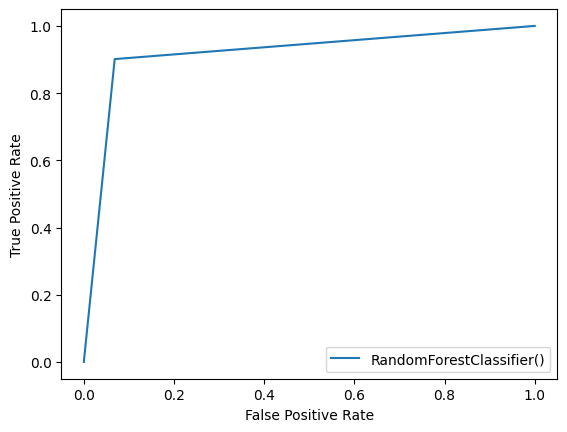

In [72]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,RFCpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = RFC)
rfcurve.plot()

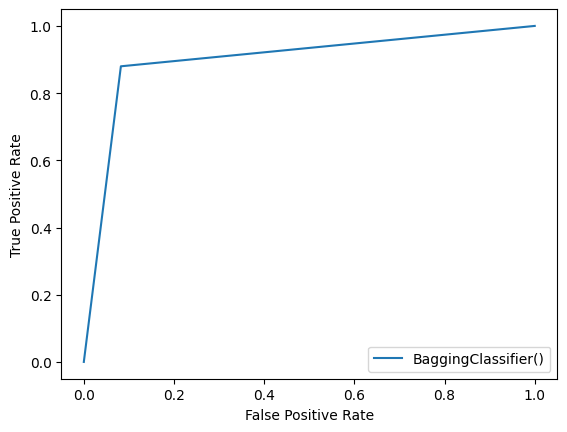

In [73]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,BCpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = BC)
rfcurve.plot()

Random Forest is the best model

In [75]:
from sklearn.model_selection import GridSearchCV

**Hyperparameter Tuning**

In [76]:
param = {'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10, 50,100]}
gscv = GridSearchCV(RFC,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 10, 50, 100],
                         'max_features': ['sqrt', 'log2', 'None']})

In [77]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt'}

In [78]:
model = RandomForestClassifier(criterion= 'gini', max_depth= 100, max_features= 'sqrt')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9026548672566371
[[201  18]
 [ 26 207]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       219
           1       0.92      0.89      0.90       233

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



In [79]:
import joblib

In [80]:
joblib.dump(model,'insurance_fraud.pk1')

['insurance_fraud.pk1']

In [81]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred
df

,Actual,Prediction
0,1,1
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
447,1,1
448,0,0
449,1,1
450,1,1
